In [1]:
import sys, os
import socket
import geopandas as gpd
import matplotlib.pyplot as plt

if 'cs-' in socket.gethostname(): sys.path.append('/p/projects/eubucco/git-ufo-map')
elif socket.gethostname() == '60-MCC': sys.path.append(r'C:\Users\miln\tubCloud\Work-in-progress\building-project\git-ufo-map')
else: sys.exit('I am sorry but who are you?')

from ufo_map.Utils.helpers import multipoly_to_largest_poly
from ufo_map.Preprocessing.preprocessing import *


In [2]:
udine = gpd.read_file(r'C:\Users\miln\tubCloud\Work-in-progress\building-project\git-ufo-map\testing\Data_Testing\Udine_bound_bldgs.shp')

In [3]:
gadm = gpd.read_file(r'C:\Users\miln\tubCloud\Work-in-progress\building-project\git-ufo-map\testing\Data_Testing\gadm_ex.shp')

In [4]:
gadm = gadm.to_crs(udine.crs)

In [5]:
boundary = gpd.GeoDataFrame(geometry=gpd.GeoSeries(gadm.geometry.iloc[0]),crs=7794)
boundary_plus_buffer = gpd.GeoDataFrame(geometry=gpd.GeoSeries(gadm.geometry.iloc[0].buffer(500)),crs=7794)


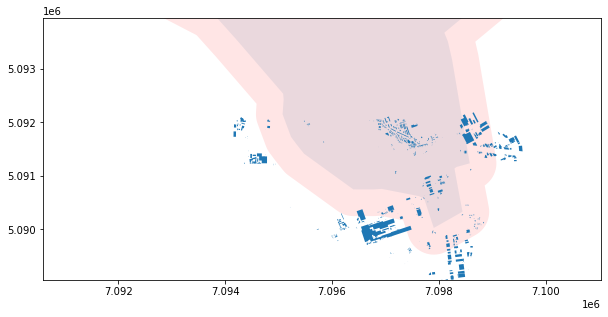

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax,alpha=0.1)
boundary_plus_buffer.plot(ax=ax,alpha=0.1, color='red')
udine.plot(ax=ax)
plt.ylim(5.089053e+06,5.093953e+06)
plt.show()

In [7]:
df = get_area_plus_buffer(udine,boundary,boundary_plus_buffer)
print(len(df[df.is_buffer==True]))
print(len(df[df.is_buffer==False]))
# get_area_plus_buffer: OK

169
336


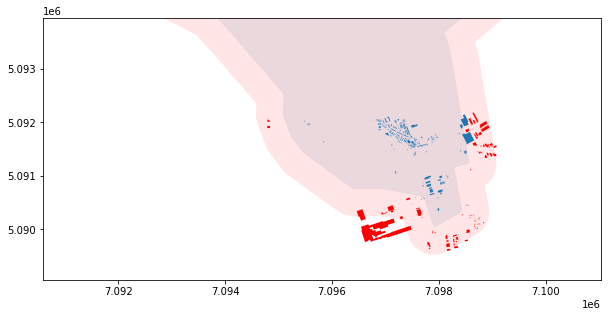

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax,alpha=0.1)
boundary_plus_buffer.plot(ax=ax,alpha=0.1, color='red')
df[df.is_buffer==True].plot(ax=ax,color='red')
df[df.is_buffer==False].plot(ax=ax)
plt.ylim(5.089053e+06,5.093953e+06)
plt.show()